## Codice usando i dati presenti nel  [paper(pag 18, paragrafo 4.2)](https://drive.google.com/file/d/1YBFS7FW81_pyuryAb5ISiofgLkT7Gp-P/view?usp=sharing).

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from utils import *
import numpy as np 
from dwave.system import DWaveSampler, EmbeddingComposite, DWaveCliqueSampler
import dimod
import dwave.inspector

mu0 = 0.0
var0 = 1

x = np.array([-2.296, -0.216, -0.082, 0.231, 1.127, 1.164, 1.189, 1.236, 1.272, 1.373])

In [3]:
Nodes = [f'a{i}' for i in range(-7, 2)] + [f'b{i}' for i in range(-7, 2)]

C_G = nx.complete_graph(Nodes)

In [4]:
bqm = dimod.BinaryQuadraticModel.empty(dimod.BINARY)

for i, node in enumerate(C_G.nodes):
    if node[0] == 'a':
        p = int(node[1:])
        w = -np.sum(2**p * fA(x, mu0, var0) + (2**(2*p - 1) - 2**p*mu0)*fAA(var0) - 2**p*var0*fAB(x, mu0, var0))
        
        bqm.add_variable(v=node, bias=w)
    else:
        p = int(node[1:])
        w = -np.sum(2**p * fB(x, mu0, var0) + (2**(2*p - 1) - 2**p*var0)*fBB(x, mu0, var0) - 2**p*var0*fAB(x, mu0, var0))
        
        bqm.add_variable(v=node, bias=w)

In [5]:
A = []
B = []
AB = []

link_A, link_B, link_AB = 0, 0, 0

for edge in C_G.edges:
    node1, node2 = edge
    if node1[0] == node2[0] == 'a':
        pi = int(node1[1:])
        pj = int(node2[1:])
        w = -2**(pi+pj)*fAA(var0)
        
        link_A += 1
        A.append(w)
        bqm.add_interaction(node1, node2, w)
        
    elif node1[0] == node2[0] == 'b':
        pi = int(node1[1:])
        pj = int(node2[1:])
        w = -np.sum(2**(pi+pj)*fBB(x, mu0, var0))
        
        link_B += 1
        B.append(w)
        bqm.add_interaction(node1, node2, w)
        
    else:
        pi = int(node1[1:])
        pj = int(node2[1:])
        w = -np.sum(2**(pi+pj)*fAB(x, mu0, var0))
        
        link_AB += 1
        AB.append(w)
        bqm.add_interaction(node1, node2, w)

In [6]:
link_A, link_B, link_AB

(36, 36, 81)

In [7]:
np.sum(-(x-mu0)**2/(var0)**2)

-14.447911999999999

In [42]:
from dwave.system import DWaveSampler, EmbeddingComposite, DWaveCliqueSampler
import dimod
import dwave.inspector

sampleset = EmbeddingComposite(DWaveSampler()).sample(bqm, num_reads=100, chain_strength=0) #

In [43]:
sampleset.variables

Variables(['a-1', 'a-2', 'a-3', 'a-4', 'a-5', 'a-6', 'a-7', 'a0', 'a1', 'b-1', 'b-2', 'b-3', 'b-4', 'b-5', 'b-6', 'b-7', 'b0', 'b1'])

In [44]:
theta = np.zeros(len(sampleset.record))
phi = np.zeros(len(sampleset.record))

for k, rec in enumerate(sampleset.record):
    states = rec[0]
    mu = 0
    var = 0
    for i, sol in enumerate(states):
        p = int(sampleset.variables[i][1:])
        if sampleset.variables[i][0] == 'a':
            mu = mu + 2**(p) * sol
        else:
            var = var + 2**(p) * sol
            
    theta[k] = mu
    phi[k] = var

(array([ 5., 14., 17.,  1.,  2.,  6., 17., 38.]),
 array([0.3671875, 0.5703125, 0.7734375, 0.9765625, 1.1796875, 1.3828125,
        1.5859375, 1.7890625, 1.9921875]),
 <BarContainer object of 8 artists>)

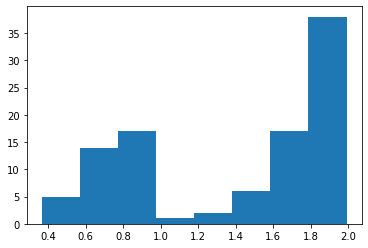

In [45]:
plt.hist(theta, bins='auto')

(array([ 1.,  1.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
         7.,  5., 16., 13., 25.,  0.,  0.,  2.,  5.,  3.,  4.,  6.,  0.,
         0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.1171875 , 0.15395221, 0.19071691, 0.22748162, 0.26424632,
        0.30101103, 0.33777574, 0.37454044, 0.41130515, 0.44806985,
        0.48483456, 0.52159926, 0.55836397, 0.59512868, 0.63189338,
        0.66865809, 0.70542279, 0.7421875 , 0.77895221, 0.81571691,
        0.85248162, 0.88924632, 0.92601103, 0.96277574, 0.99954044,
        1.03630515, 1.07306985, 1.10983456, 1.14659926, 1.18336397,
        1.22012868, 1.25689338, 1.29365809, 1.33042279, 1.3671875 ,
        1.40395221, 1.44071691, 1.47748162, 1.51424632, 1.55101103,
        1.58777574, 1.62454044, 1.66130515, 1.69806985, 1.73483456,
        1.77159926, 1.80836397, 1.84512868, 1.88189338, 1.91865809,
        1.95542279, 1.9921875 ]

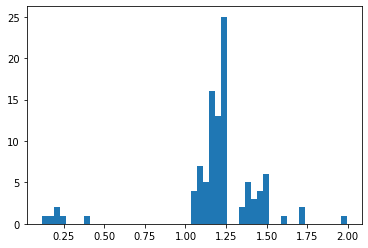

In [46]:
plt.hist(phi, bins='auto')

In [47]:
dwave.inspector.show(sampleset)

'http://127.0.0.1:18000/?problemId=df9d5a9d-60b1-4ccd-9b65-53ad58cee225'